In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

In [2]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [73]:
parent_avgs = (families.column('father') + families.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
).where('Sex', 'male').drop('Sex')
heights

Parent Average,Child
72.75,73.2
71,73.5
71,72.5
69.5,71
69.5,70.5
69.5,68.5
66.75,72
66.75,69
66.75,68
71,76.5


In [74]:
parent_avgs = (families.column('father') + families.column('mother'))/2
all_heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)

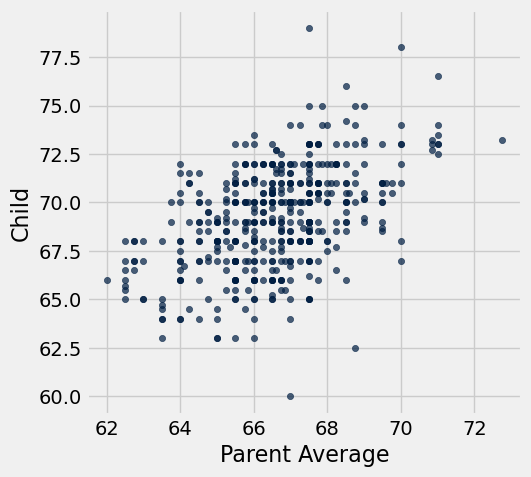

In [75]:
heights.scatter("Parent Average", "Child")

In [76]:
np.average(heights.column("Parent Average"))

66.585446985446978

In [77]:
np.std(heights.column("Parent Average"))

1.7043408739911814

In [78]:
p_heights = heights.column("Parent Average")

In [79]:
p_h_avg = np.average(p_heights)

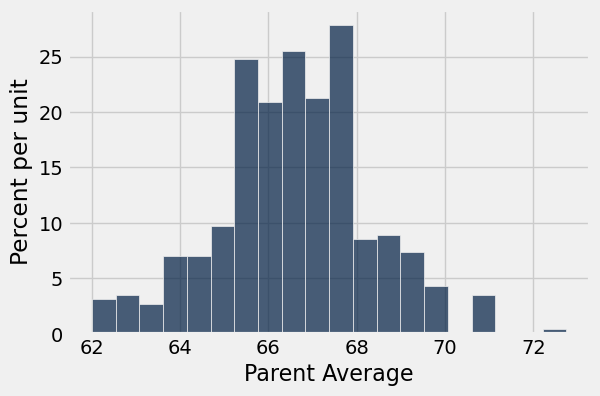

In [80]:
heights.hist("Parent Average", bins=20)

In [81]:
shifted_heights = p_heights - p_h_avg

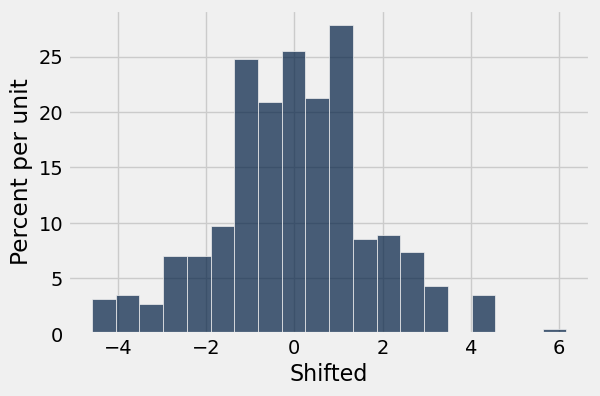

In [82]:
Table().with_column("Shifted", shifted_heights).hist(bins=20)

In [83]:
p_std_dev = np.std(p_heights)

In [84]:
std_p_heights = shifted_heights / p_std_dev

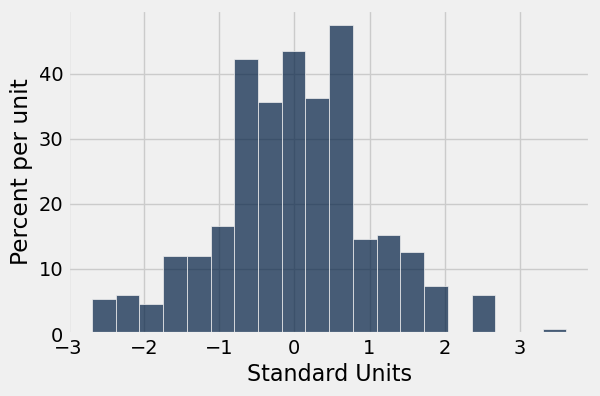

In [85]:
Table().with_column("Standard Units", std_p_heights).hist(bins=20)

In [86]:
c_heights = heights.column("Child")
c_h_avg = np.average(c_heights)
c_std_dev = np.std(c_heights)
std_c_heights = (c_heights - c_h_avg) / c_std_dev

In [87]:
c_h_avg

69.234095634095652

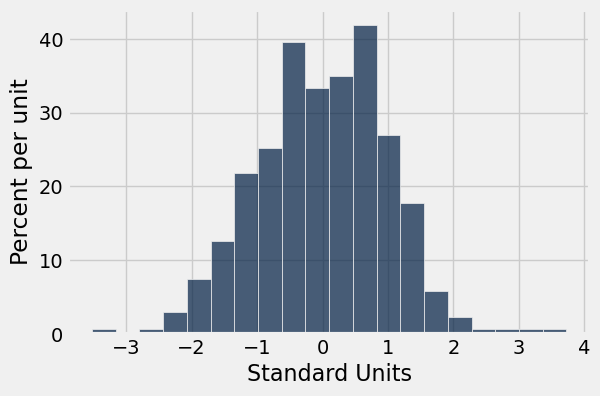

In [88]:
Table().with_column("Standard Units", std_c_heights).hist(bins=20)

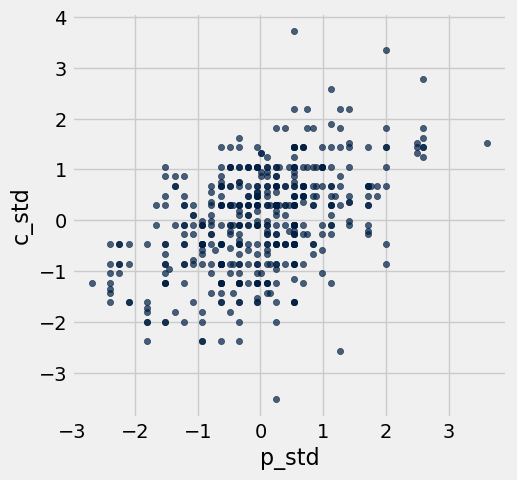

In [89]:
Table().with_columns("p_std", std_p_heights, "c_std", std_c_heights).scatter("p_std")

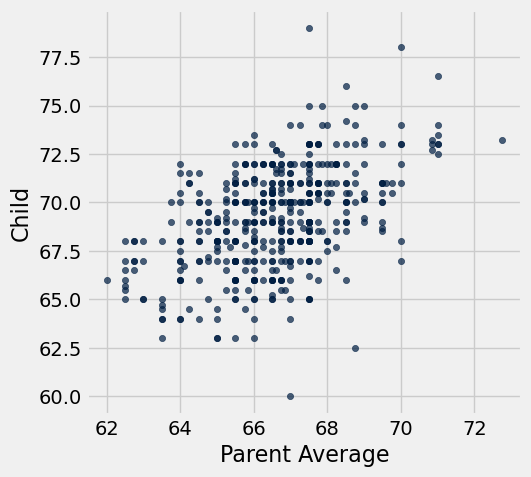

In [90]:
heights.scatter("Parent Average", "Child")

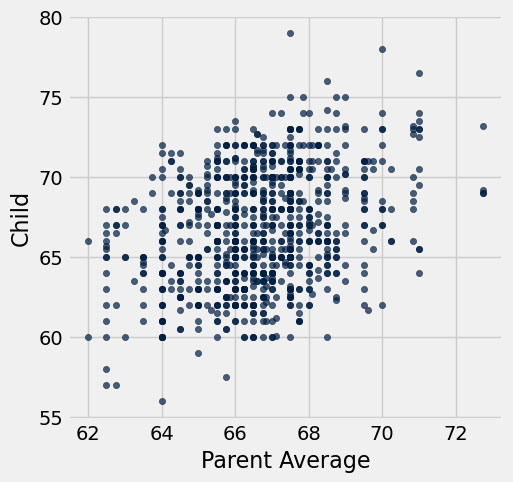

In [91]:
all_heights.scatter("Parent Average", "Child")

In [56]:
g_corr_coef = np.average(std_c_heights * std_p_heights)

In [57]:
g_corr_coef

0.51545272912523399

In [92]:
b_corr_coef = np.average(std_c_heights * std_p_heights)

In [93]:
b_corr_coef

0.48491463950552038

In [164]:
def make_up_some_data(randomness=0, x_std=4, x_mean=10, y_std=3, y_mean=20, y_slope=1):
    x = make_array()
    y = make_array()
    for _ in np.arange(500):
        new_x = np.random.normal(x_mean, x_std)
        new_y = np.random.normal(y_mean, y_std)
        x = np.append(x, new_x)
        y = np.append(y, new_x * y_slope * (1 - randomness) + new_y * randomness)
    return Table().with_columns("X", x, "Y", y) 

In [182]:
data_one = make_up_some_data(randomness=0)
data_two = make_up_some_data(randomness=.7, y_slope=.4)
data_three = make_up_some_data(randomness=1)

(0.0, 25.0)

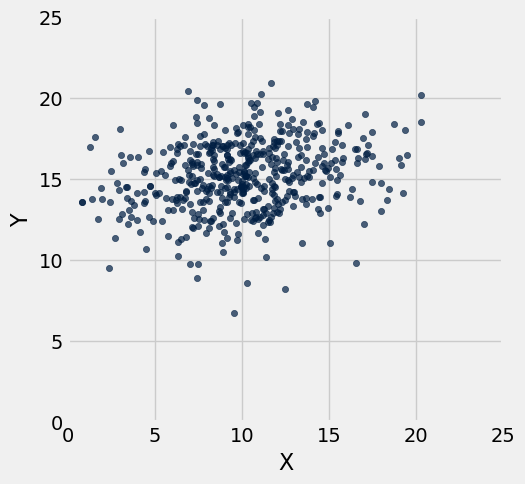

In [183]:
data_two.scatter("X")
plots.ylim(0,25)
plots.xlim(0,25)

In [156]:
def standard_units(x):
    mean = np.average(x)
    std = np.std(x)
    return (x - mean) / std

In [157]:
def convert_table_to_std_units(table, x_label="X", y_label="Y"):
    x_std = standard_units(table.column(x_label))
    y_std = standard_units(table.column(y_label))
    return Table().with_columns(x_label, x_std, y_label, y_std)  

In [158]:
def corr_coef(table, x_label="X", y_label="Y"):
    x = table.column(x_label)
    y = table.column(y_label)
    return np.average(x * y)

In [159]:
def draw_line(slope=0, intercept=0, x=make_array(-3, 25), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)

In [184]:
std_two = convert_table_to_std_units(data_two)

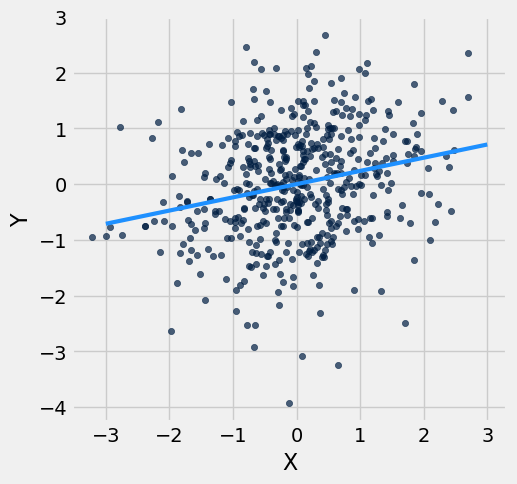

In [185]:
std_two.scatter("X")
cc = corr_coef(std_two)
draw_line(slope=cc, x=make_array(-3, 3))

In [186]:
r = corr_coef(std_two)

In [187]:
def original_units(x, y, table):
    X = table.column("X")
    Y = table.column("Y")
    avg_x = np.average(X)
    avg_y = np.average(Y)
    sd_x = np.std(X)
    sd_y = np.std(Y)
    orig_x = x * sd_x + avg_x
    orig_y = y * sd_y + avg_y
    return orig_x, orig_y

In [188]:
x_1, y_1 = original_units(0, 0, data_two)

In [189]:
x_1, y_1

(9.9506632270960864, 15.146280764889369)

In [190]:
x_2, y_2 = original_units(1, r, data_two)

In [191]:
x_2, y_2

(13.78856919728814, 15.655342945681006)

In [179]:
def draw_line_two_points(x_1, y_1, x_2, y_2, x=make_array(-3, 25), color='#1e90ff'):
    slope = (y_2 - y_1) / (x_2 - x_1)
    y = slope * (x - x_1) + y_1
    plots.plot(x, y, color=color, lw=3)

(0.0, 25.0)

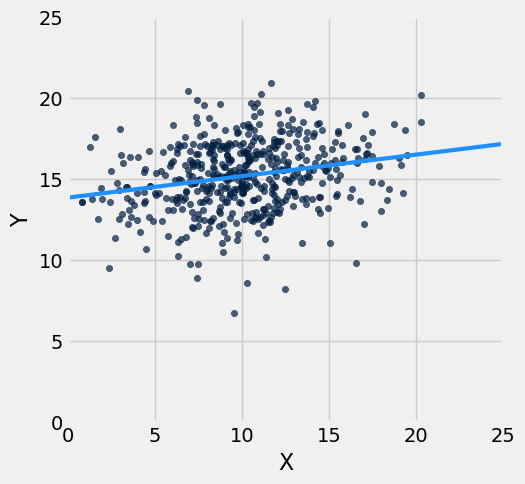

In [192]:
data_two.scatter("X")
draw_line_two_points(x_1, y_1, x_2, y_2)
plots.ylim(0,25)
plots.xlim(0,25)